In [ ]:
!pip install spacy
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 1.6 MB/s 
     |████████████████████████████████| 71 kB 5.7 MB/s 
     |████████████████████████████████| 13.5 MB 9.5 MB/s 
     |████████████████████████████████| 188 kB 51.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125.1 MB 34 kB/s 
     |████████████████████████████████| 5.8 MB 2.7 MB/s 
     |████████████████████████████████| 660 kB 69.3 MB/s 
     |████████████████████████████████| 10.1 MB 45.8 MB/s 
  Created wheel for en-ner-bc5cdr-md: filename=en_ner_bc5cdr_md-0.4.0-py3-none-any.whl size=125666883 sha256=c1445fa158bdbebe23eeaa76f88399f9bdd35006ba22fc9b8eb17c3f6f22660a
  Stored in directory: /root/.cache/pip/wheels/6a/17/04/ed8f50ffdcb9b

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from wordcloud import STOPWORDS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import scispacy
import en_ner_bc5cdr_md
from spacy import displacy

In [ ]:
df = pd.read_excel("/content/ER_OCTOBER ICD 10_new بدون تجويد .xlsx")
df.head(5)

,DATE,MRN,PATH,TEXT,TEXT.1,clean text,ICD-10
0,2022-10-01,115990,Z:/تقارير الطوارئ/2022/Oct\1-10\115990.docx,تقريـر طـبـى مبدئى_x000D_\n_x000D_\n_x000D_\n_...,تقريـر طـبـى مبدئى_x000D_ _x000D_ _x000D_ _x00...,تقريـر طـبـى مبدئى إلى : من يهمه الامر ال...,NaN
1,2022-10-01,116269,Z:/تقارير الطوارئ/2022/Oct\1-10\116269.docx,تقريـر طـبـى مبدئى_x000D_\n_x000D_\n_x000D_\n_...,Initial medical report_x000D_ _x000D_ _x000D_ ...,Initial medical report To: Whom It May Conc...,NaN
2,2022-10-01,118669,Z:/تقارير الطوارئ/2022/Oct\1-10\118669.docx,تقريـر طـبـى مبدئى_x000D_\n_x000D_\n_x000D_\n_...,Read the premature_ x000D_ _x000D_ _x000D_ _x0...,Read the premature_ x000D_ to: Who is inter...,NaN
3,2022-10-01,126172,Z:/تقارير الطوارئ/2022/Oct\1-10\126172.docx,تقريـر طـبـى مبدئى_x000D_\n_x000D_\n_x000D_\n_...,تقريـر طـبـى مبدئى_x000D_ _x000D_ _x000D_ _x00...,تقريـر طـبـى مبدئى إلى : من يهمه الامر ال...,NaN
4,2022-10-01,127352,Z:/تقارير الطوارئ/2022/Oct\1-10\127352.docx,تقريـر طـبـى مبدئى_x000D_\n_x000D_\n_x000D_\n_...,Initial medical report_x000D_ _x000D_ _x000D_ ...,Initial medical report To: To Whom It May C...,NaN


In [ ]:
#the column that contains the medical text
df.iloc[:,5]

0       تقريـر طـبـى مبدئى    إلى : من يهمه الامر   ال...
1       Initial medical report    To: Whom It May Conc...
2       Read the premature_ x000D_    to: Who is inter...
3       تقريـر طـبـى مبدئى    إلى : من يهمه الامر   ال...
4       Initial medical report    To: To Whom It May C...
                              ...                        
1747    Initial medical reportx000Dx000D_ To: To Whom ...
1748    Initial medical report    To: To Whom It May C...
1749    Read a predecessor_ x000D_    to: Who is inter...
1750    Initial medical report    To: To Whom It May C...
1751    Initial medical report    To: Whom It May Conc...
Name: clean text, Length: 1752, dtype: object

In [ ]:
sci_nlp = spacy.load('en_ner_bc5cdr_md')

In [ ]:
sci_nlp.component_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner']

In [ ]:
sci_nlp.get_pipe('ner').labels

('CHEMICAL', 'DISEASE')

In [ ]:
sci_nlp.get_pipe('parser').labels

('ROOT',
 'acl',
 'acl:relcl',
 'acomp',
 'advcl',
 'advmod',
 'amod',
 'amod@nmod',
 'appos',
 'attr',
 'aux',
 'auxpass',
 'case',
 'cc',
 'cc:preconj',
 'ccomp',
 'compound',
 'compound:prt',
 'conj',
 'cop',
 'csubj',
 'dative',
 'dep',
 'det',
 'det:predet',
 'dobj',
 'expl',
 'intj',
 'mark',
 'meta',
 'mwe',
 'neg',
 'nmod',
 'nmod:npmod',
 'nmod:poss',
 'nmod:tmod',
 'nsubj',
 'nsubjpass',
 'nummod',
 'parataxis',
 'pcomp',
 'pobj',
 'preconj',
 'predet',
 'prep',
 'punct',
 'quantmod',
 'xcomp')

In [ ]:
x = df.iloc[:,5]

In [ ]:
docx = x.to_string('my_file.txt',index = False)

In [ ]:
#('CHEMICAL', 'DISEASE')
def extract_diseases(x):
  docx = sci_nlp(x)
  results = [ent.text for ent in docx.ents if ent.label_ =='DISEASE'] #('CHEMICAL', 'DISEASE')
  return results

In [ ]:
with open('/content/my_file.txt', 'r') as file:
    document = file.read().rstrip()

In [19]:
document

'تقريـر طـبـى مبدئى    إلى : من يهمه الامر   الأ...\nInitial medical report    To: Whom It May Conce...\nRead the premature_ x000D_    to: Who is intere...\nتقريـر طـبـى مبدئى    إلى : من يهمه الامر   الأ...\nInitial medical report    To: To Whom It May Co...\nRead the premature_ x000D_    to: Who is concer...\nInitial medical reportx000Dx000D_ To: To Whom I...\nInitial medical reportx000Dx000D_ To: To Whom I...\nInitial medical report    To: Whom It May Conce...\nInitial medical report    To: To Whom It May Co...\nRead a premature_ x000D_    to: Who is concerne...\nتقريـر طـبـى مبدئى    إلى : من يهمه الامر   الأ...\nInitial medical report    To: Whom It May Conce...\nInitial medical report    To: Whom It May Conce...\nInitial medical reportx000Dx000D_ To: To Whom I...\nRead a premature_ x000D_    to: Who is interest...\nThe premature reader_ x000D_    to: Who is conc...\nInitial medical report    To: Whom It May Conce...\nRead a predecessor_ x000D_    to: Who is intere...\nInitial med

(-0.5, 399.5, 199.5, -0.5)

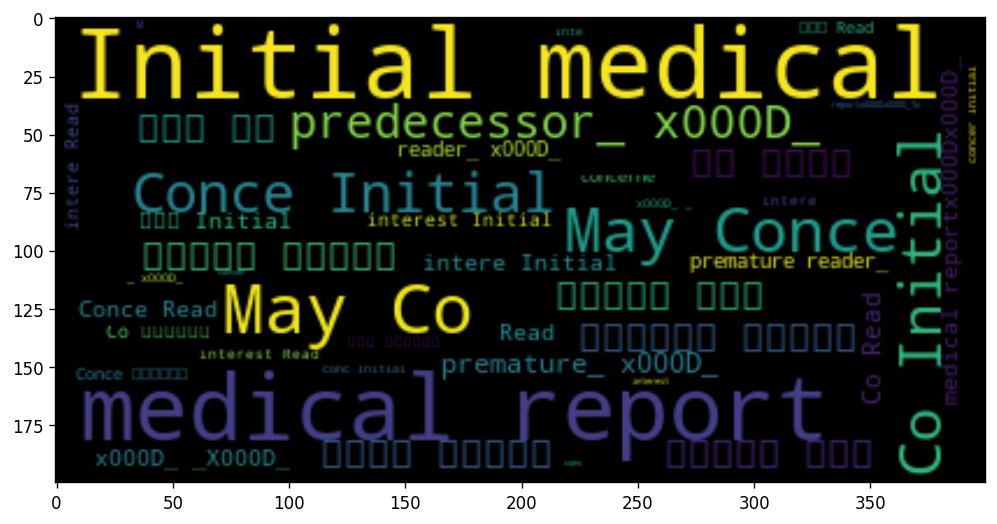

In [ ]:
wordcloud = WordCloud().generate(document)
plt.figure(figsize=(10,10), dpi=120)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis()

In [ ]:
df['diseases'] = x.apply(lambda x:extract_diseases(x))

In [ ]:
# determining the name of the file
file_name = 'Collection_of_diseases_inp.xlsx'
  
# saving the excel
df['diseases'].to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
